# Análisis de correlación entre películas

In [2]:
# Importar las librerías requeridas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
## matplotlib.rcParams['figure.figsize'] = (12,8)

In [3]:
# Cargar los datos obtenidos de movies.csv
df=pd.read_csv('movies.csv')

In [41]:
df.head(10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
5,Friday the 13th,R,Horror,1980,"May 9, 1980 (United States)",6.4,123000.0,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000.0,39754601.0,Paramount Pictures,95.0
6,The Blues Brothers,R,Action,1980,"June 20, 1980 (United States)",7.9,188000.0,John Landis,Dan Aykroyd,John Belushi,United States,27000000.0,115229890.0,Universal Pictures,133.0
7,Raging Bull,R,Biography,1980,"December 19, 1980 (United States)",8.2,330000.0,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000.0,23402427.0,Chartoff-Winkler Productions,129.0
8,Superman II,PG,Action,1980,"June 19, 1981 (United States)",6.8,101000.0,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000.0,108185706.0,Dovemead Films,127.0
9,The Long Riders,R,Biography,1980,"May 16, 1980 (United States)",7.0,10000.0,Walter Hill,Bill Bryden,David Carradine,United States,10000000.0,15795189.0,United Artists,100.0


## Limpieza de datos

In [5]:
# Búsqueda de datos faltantes
for col in df.columns:
    pct_missing = np.mean(df[col].isnull()*100)
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 1.0041731872717787%
genre - 0.0%
year - 0.0%
released - 0.02608242044861763%
score - 0.03912363067292645%
votes - 0.03912363067292645%
director - 0.0%
writer - 0.03912363067292645%
star - 0.013041210224308816%
country - 0.03912363067292645%
budget - 28.31246739697444%
gross - 2.464788732394366%
company - 0.22170057381324987%
runtime - 0.05216484089723526%


In [6]:
df.isnull().head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


Cómo observamos existen filas con valores nulos en atributos como: rating, released, score, votes, writer, star, country, budget, gross, company, runtime. Siendo budget el que mayor porcentaje de valores faltantes tiene con el 28.3%
Dado que son porcentajes elevados, podríamos optar por no eliminar los registro con faltantes.

In [8]:
df2 = df.dropna() # Eliminación de todas las filas que contengan un NA en cualquiera de los atributos

In [9]:
print(np.shape(df))

(7668, 15)


In [10]:
print(np.shape(df2))

(5421, 15)


In [11]:
x = len(df.index)
y = len(df2.index)
print(x - y)
print((x-y)*100/x)

2247
29.30359937402191


Si eliminaramos los registros con NA en cualquiera de sus atributos, estaríamos eliminando 2247 filas, es decir el 29.3% de los datos. Mientras tanto seguiremos trabajando con los registros sin NA.

In [12]:
# Búsqueda de datos faltantes en df2
for col in df2.columns:
    pct_missing = np.mean(df2[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%


In [13]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5421 entries, 0 to 7652
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      5421 non-null   object 
 1   rating    5421 non-null   object 
 2   genre     5421 non-null   object 
 3   year      5421 non-null   int64  
 4   released  5421 non-null   object 
 5   score     5421 non-null   float64
 6   votes     5421 non-null   float64
 7   director  5421 non-null   object 
 8   writer    5421 non-null   object 
 9   star      5421 non-null   object 
 10  country   5421 non-null   object 
 11  budget    5421 non-null   float64
 12  gross     5421 non-null   float64
 13  company   5421 non-null   object 
 14  runtime   5421 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 677.6+ KB


Revisión de los tipos de datos de los atributos.

In [14]:
df2.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

Aquí vemos como algúnos atributos como lo son votes, budget y gross son float64 cuando realmente son int64, por lo que se decide realizar un cambio del tipo de dato a estos atributos.

In [15]:
df2.loc[:,'votes'] = df2.loc[:,'votes'].astype('int64')
df2.loc[:,'budget'] = df2.loc[:,'budget'].astype('int64')
df2.loc[:,'gross'] = df2.loc[:,'gross'].astype('int64')

E:\Anaconda\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [16]:
# Validación de la actualización de los tipos de datos
df2.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes         int64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime     float64
dtype: object

Extracción del año de la fecha de liberación 'released'

In [17]:
df2['year_released'] = df2['released'].str.extract(pat = '([0-9]{4})').astype(int)

<ipython-input-17-0752946bc1b6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['year_released'] = df2['released'].str.extract(pat = '([0-9]{4})').astype(int)


In [40]:
df2.head(10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_released
0,4692,6,6,1980,1304,8.4,927000,1795,2832,699,46,19000000,46998772,1426,146.0,1980
1,3929,6,1,1980,1127,5.8,65000,1578,1158,214,47,4500000,58853106,452,104.0,1980
2,3641,4,0,1980,1359,8.7,1200000,757,1818,1157,47,18000000,538375067,945,124.0,1980
3,204,4,4,1980,1127,7.7,221000,889,1413,1474,47,3500000,83453539,1108,88.0,1980
4,732,6,4,1980,1170,7.3,108000,719,351,271,47,6000000,39846344,1083,98.0,1980
5,1509,6,9,1980,1922,6.4,123000,1758,3081,155,47,550000,39754601,1108,95.0,1980
6,3930,6,0,1980,1359,7.9,188000,974,576,860,47,27000000,115229890,1397,133.0,1980
7,3122,6,3,1980,530,8.2,330000,1269,1257,1469,47,18000000,23402427,390,129.0,1980
8,3732,4,0,1980,1346,6.8,101000,1606,1402,595,47,54000000,108185706,548,127.0,1981
9,4401,6,3,1980,1755,7.0,10000,2011,280,402,47,10000000,15795189,1391,100.0,1980


Órdenar los valores por el atributo gross de manera descendente

In [39]:
df2.sort_values(by=['gross'], inplace = False, ascending = False).head(10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_released
5445,386,5,0,2009,527,7.8,1100000,785,1263,1534,47,237000000,2847246203,1382,162.0,2009
7445,388,5,0,2019,137,8.4,903000,105,513,1470,47,356000000,2797501328,983,181.0,2019
3045,4909,5,6,1997,534,7.8,1100000,785,1263,1073,47,200000000,2201647264,1382,194.0,1997
6663,3643,5,0,2015,529,7.8,876000,768,1806,356,47,245000000,2069521700,945,138.0,2015
7244,389,5,0,2018,145,8.4,897000,105,513,1470,47,321000000,2048359754,983,149.0,2018
7480,4388,4,2,2019,1126,6.9,222000,1012,1361,457,47,260000000,1670727580,1423,118.0,2019
6653,2117,5,0,2015,1303,7.0,593000,335,2523,293,47,150000000,1670516444,1397,124.0,2015
6043,3878,5,0,2012,1899,8.0,1300000,1060,1646,1470,47,220000000,1518815515,983,143.0,2012
6646,1541,5,0,2015,165,7.1,370000,809,481,1785,47,190000000,1515341399,1397,137.0,2015
7494,1530,4,2,2019,2053,6.8,148000,277,1383,1036,47,150000000,1450026933,1422,103.0,2019


In [20]:
## pd.set_option('display.max_rows', None)

In [38]:
# Establecer si hay registros duplicados y en dado caso elimianrlos
df2['company'].drop_duplicates().sort_values(ascending = False).head(10)
# Eliminar duplicados no se realiza ya que no se encuentran.
# df2['company'] = df2['company'].drop_duplicates()

7129    1474
5664    1473
4007    1472
6793    1471
6420    1470
3776    1469
3330    1468
146     1467
2213    1466
3698    1465
Name: company, dtype: int16

In [37]:
df2.duplicated(keep = False).head(10) # Otra opción para establecer si existen registros duplicados o no
# df2.drop_duplicates() # otra opción para elimanr registros duplicados

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
dtype: bool

In [23]:
# Validación de dupliados consultando ciertas columnas
df2[df2.duplicated(['name','year_released'],keep = False)].sort_values(by=['name'], inplace = False, ascending = False)
# En este set de datos no hay peliculas repetidas por nombre y año de lanzamiento,
# las dos que se encuentran son películas diferentes

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_released
4212,No Good Deed,R,Crime,2002,"November 20, 2014 (Germany)",5.4,7100,Bob Rafelson,Dashiell Hammett,Samuel L. Jackson,Germany,12000000,1440653,ApolloMedia Distribution,97.0,2014
6617,No Good Deed,PG-13,Thriller,2014,"September 12, 2014 (United States)",5.6,20000,Sam Miller,Aimee Lagos,Taraji P. Henson,United States,13200000,54323210,Screen Gems,84.0,2014


# Análisis para buscar correlaciones entre los datos

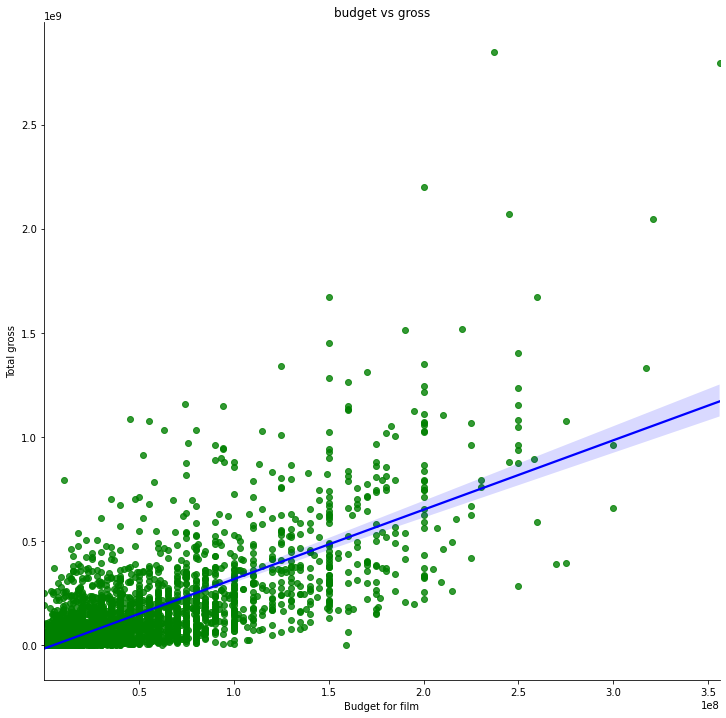

In [24]:
# Graficar budget vs gross
sns.lmplot(x='budget', y='gross', data=df2, height = 10, aspect = 1, scatter_kws={'color':'green'}, line_kws={'color':'blue'})
plt.title('budget vs gross')
plt.xlabel('Budget for film')
plt.ylabel('Total gross')
sns.color_palette("crest", as_cmap=True)
plt.show()

No parece existir una correlación clara entre los atributos budget y gross, por lo menos a partir del gráfico.

In [25]:
# Correlación ente variables cuantitativas
df2.corr(method= 'spearman') # Métodos de correlación: pearson (por defecto), kendall, spearman

,year,score,votes,budget,gross,runtime,year_released
year,1.000000,0.057741,0.427623,0.312886,0.351045,0.095444,0.998694
score,0.057741,1.000000,0.495409,-0.009971,0.183192,0.412155,0.063674
votes,0.427623,0.495409,1.000000,0.493461,0.745793,0.300621,0.422988
budget,0.312886,-0.009971,0.493461,1.000000,0.692958,0.330794,0.302535
gross,0.351045,0.183192,0.745793,0.692958,1.000000,0.257400,0.340529
runtime,0.095444,0.412155,0.300621,0.330794,0.257400,1.000000,0.095507
year_released,0.998694,0.063674,0.422988,0.302535,0.340529,0.095507,1.000000


Con la información numérica de la correlación entre variables, nos es más fácil establecer que hay cierta correlación positiva entre: 
- gross y budget: 0.74 --> Esto nos quiere insinuar que existe una relación positiva entre la inversión en una película y los ingresos obtenidos.
- gross y votes: 0.61 --> Nos lleva a pensar que existe una relación positiva entre los ingresos de una película y la cantidad de personas que votan en IMDb.

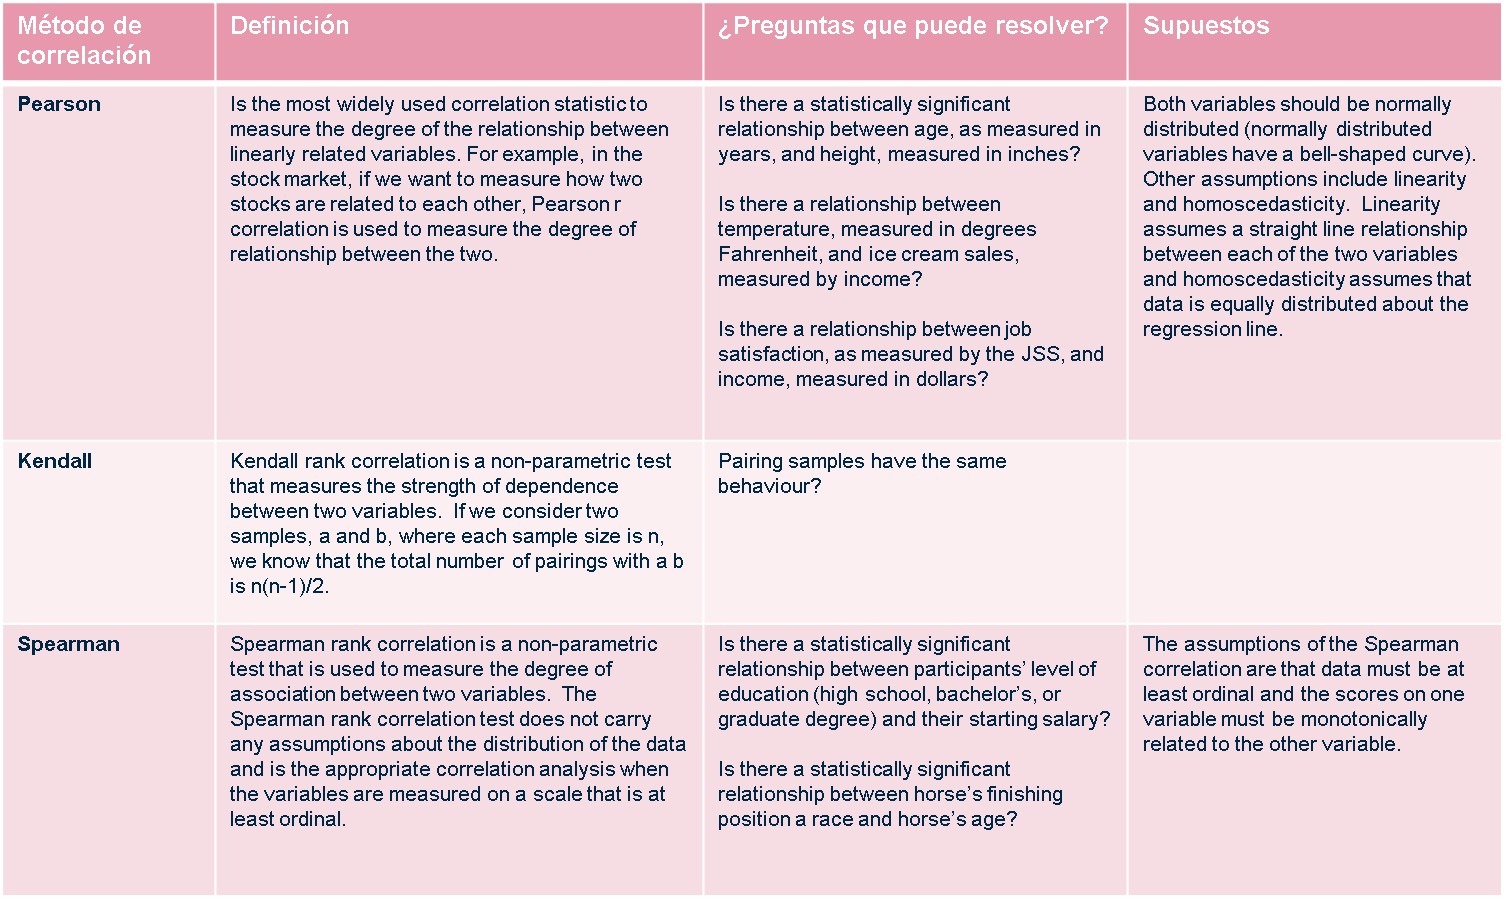

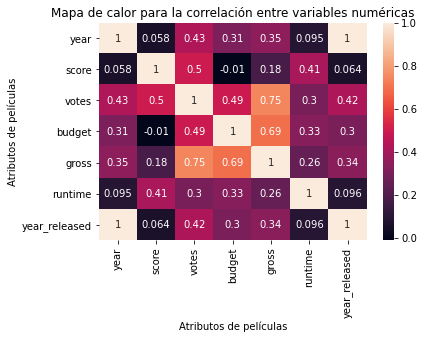

In [26]:
# Generación de mapa de calor para la correlación entre variables
matriz_correlacion = df2.corr(method='spearman')
sns.heatmap(matriz_correlacion, annot=True)
plt.title('Mapa de calor para la correlación entre variables numéricas')
plt.xlabel('Atributos de películas')
plt.ylabel('Atributos de películas')
plt.show()

En el mapa de calor se muestra como la correlación más alta se da para las parejas de variables:
- gross y votes
- gross y budget

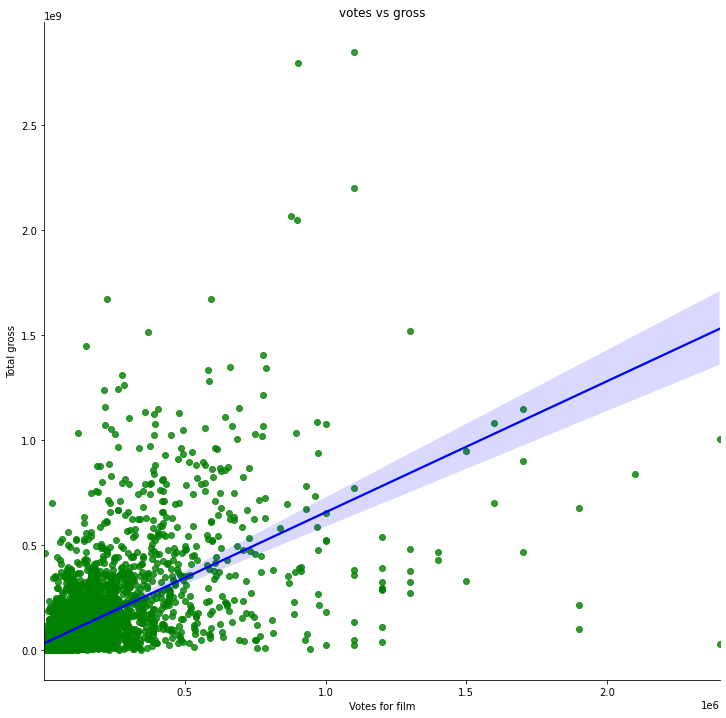

In [27]:
# Graficar votes vs gross
sns.lmplot(x='votes', y='gross', data=df2, height = 10, aspect = 1, scatter_kws={'color':'green'}, line_kws={'color':'blue'})
plt.title('votes vs gross')
plt.xlabel('Votes for film')
plt.ylabel('Total gross')
sns.color_palette("crest", as_cmap=True)
plt.show()

### Transformación de los atributos categóricos a numéricos para poder establecer sus correlaciones.

In [36]:
df_cat = df2
for column_name in df_cat.columns:
    if(df_cat[column_name].dtype=='object'):
        df_cat[column_name]=df_cat[column_name].astype('category')
        df_cat[column_name]=df_cat[column_name].cat.codes
df_cat.head(10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_released
0,4692,6,6,1980,1304,8.4,927000,1795,2832,699,46,19000000,46998772,1426,146.0,1980
1,3929,6,1,1980,1127,5.8,65000,1578,1158,214,47,4500000,58853106,452,104.0,1980
2,3641,4,0,1980,1359,8.7,1200000,757,1818,1157,47,18000000,538375067,945,124.0,1980
3,204,4,4,1980,1127,7.7,221000,889,1413,1474,47,3500000,83453539,1108,88.0,1980
4,732,6,4,1980,1170,7.3,108000,719,351,271,47,6000000,39846344,1083,98.0,1980
5,1509,6,9,1980,1922,6.4,123000,1758,3081,155,47,550000,39754601,1108,95.0,1980
6,3930,6,0,1980,1359,7.9,188000,974,576,860,47,27000000,115229890,1397,133.0,1980
7,3122,6,3,1980,530,8.2,330000,1269,1257,1469,47,18000000,23402427,390,129.0,1980
8,3732,4,0,1980,1346,6.8,101000,1606,1402,595,47,54000000,108185706,548,127.0,1981
9,4401,6,3,1980,1755,7.0,10000,2011,280,402,47,10000000,15795189,1391,100.0,1980


In [35]:
# Correlación ente variables cuantitativas y cualitativas
df_cat.corr(method= 'spearman').head(10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_released
name,1.000000,-0.021980,0.008213,0.027766,-0.006341,0.007866,0.003615,0.014933,0.013023,-0.007027,-0.026431,0.021395,0.000038,0.021247,0.014849,0.027590
rating,-0.021980,1.000000,0.167778,-0.018206,0.031301,0.085237,-0.011871,0.007809,0.002124,0.019408,-0.011824,-0.267486,-0.256014,-0.108557,0.110151,-0.013863
genre,0.008213,0.167778,1.000000,-0.080105,0.022254,0.061615,-0.182682,-0.007466,0.015393,0.003449,-0.015225,-0.372729,-0.268314,-0.080808,-0.040119,-0.075633
year,0.027766,-0.018206,-0.080105,1.000000,-0.002404,0.057741,0.427623,-0.037591,-0.027646,-0.032760,-0.072272,0.312886,0.351045,-0.008798,0.095444,0.998694
released,-0.006341,0.031301,0.022254,-0.002404,1.000000,0.042145,0.006280,0.002797,0.007941,0.015392,-0.021012,-0.000495,-0.027079,0.002086,0.017166,-0.006623
score,0.007866,0.085237,0.061615,0.057741,0.042145,1.000000,0.495409,0.013366,0.013441,0.006735,-0.124916,-0.009971,0.183192,0.013694,0.412155,0.063674
votes,0.003615,-0.011871,-0.182682,0.427623,0.006280,0.495409,1.000000,-0.001819,-0.001398,-0.011716,0.010930,0.493461,0.745793,0.159554,0.300621,0.422988
director,0.014933,0.007809,-0.007466,-0.037591,0.002797,0.013366,-0.001819,1.000000,0.262486,0.036264,-0.007505,-0.003890,-0.012746,-0.009778,0.003444,-0.036677
writer,0.013023,0.002124,0.015393,-0.027646,0.007941,0.013441,-0.001398,0.262486,1.000000,0.018573,0.019264,-0.021810,-0.014593,-0.004120,-0.032161,-0.027295
star,-0.007027,0.019408,0.003449,-0.032760,0.015392,0.006735,-0.011716,0.036264,0.018573,1.000000,-0.011795,-0.016657,-0.009461,0.011481,0.002635,-0.033133


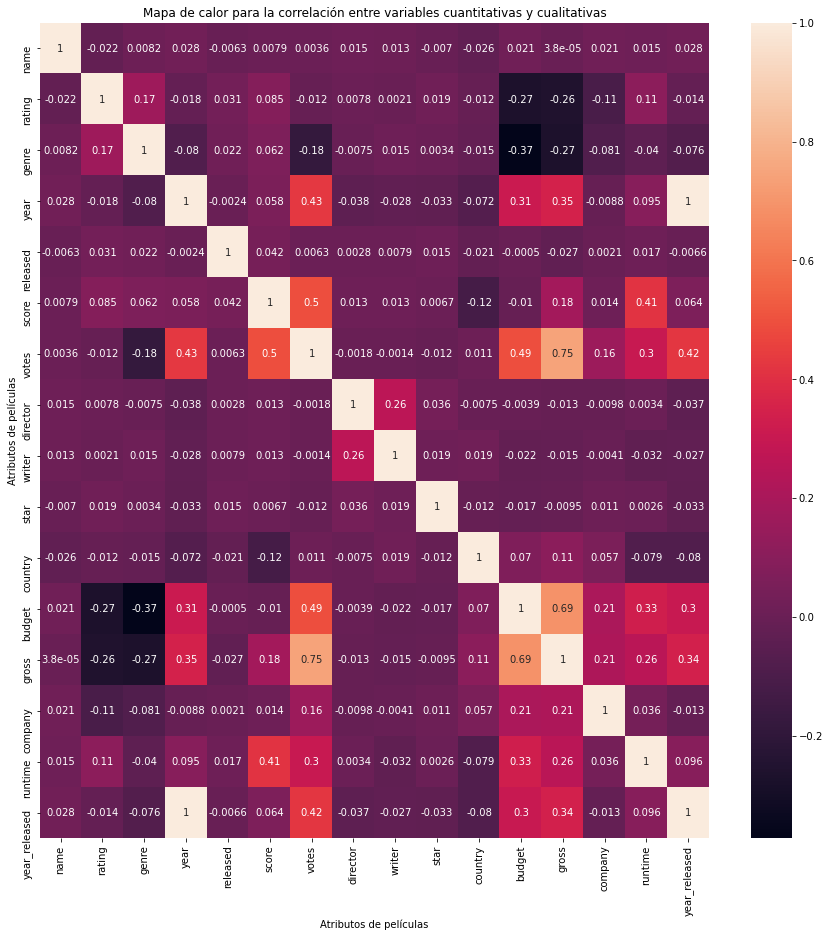

In [44]:
# Generación de mapa de calor para la correlación entre variables cuantitativas y cualitativas
matriz_correlacion_all = df_cat.corr(method='spearman')
plt.figure(figsize = (15,15))
sns.heatmap(matriz_correlacion_all, annot=True)
plt.title('Mapa de calor para la correlación entre variables cuantitativas y cualitativas')
plt.xlabel('Atributos de películas')
plt.ylabel('Atributos de películas')
plt.show()

In [46]:
# Obtención de los pares de atributos con la correlación
correlation_matriz = matriz_correlacion_all.unstack().sort_values()
correlation_matriz

genre          budget          -0.372729
budget         genre           -0.372729
genre          gross           -0.268314
gross          genre           -0.268314
budget         rating          -0.267486
                                  ...   
year           year             1.000000
genre          genre            1.000000
rating         rating           1.000000
runtime        runtime          1.000000
year_released  year_released    1.000000
Length: 256, dtype: float64

In [32]:
correlation_matriz[(correlation_matriz) > 0.5]

budget         gross            0.692958
gross          budget           0.692958
               votes            0.745793
votes          gross            0.745793
year           year_released    0.998694
year_released  year             0.998694
name           name             1.000000
company        company          1.000000
gross          gross            1.000000
budget         budget           1.000000
country        country          1.000000
star           star             1.000000
writer         writer           1.000000
director       director         1.000000
votes          votes            1.000000
score          score            1.000000
released       released         1.000000
year           year             1.000000
genre          genre            1.000000
rating         rating           1.000000
runtime        runtime          1.000000
year_released  year_released    1.000000
dtype: float64

In [33]:
correlation_matriz[(correlation_matriz) < -0.5]

Series([], dtype: float64)

# Conclusiones del análisis de correlación:

Tras la obtención de las correlaciones para las variables cuantitativas y cualitativas del set de datos para las peliculas en IMBd, podemos concluir que las parejas de atributos que tienen un comportamiento correlacionado son:

- gross y budget: con una correlación de 0.74 --> Esto nos quiere insinuar que existe una relación positiva entre la inversión en una película y los ingresos obtenidos.
- gross y votes: con una correlación de 0.61 --> Nos lleva a pensar que existe una relación positiva entre los ingresos de una película y la cantidad de personas que votan en IMDb.

Además nos puede llevar a establecer que atributos categoricos como la productora, la clasificación o la estrella principal, no nos puedan ayudar a entender los ingresos, la inversión o cualquier otra variable.